In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris_df.iloc[: , [0,1,2,3]].values
y = iris.target

In [4]:
iris_df['target'] = y
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [7]:
X = iris_df.drop('target',axis=1)
y=iris_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
pred = dtree.predict(X_test)
pred

array([1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

[Text(1953.0, 2201.58, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 37, 41]\nclass = setosa'),
 Text(1464.75, 1712.34, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(2441.25, 1712.34, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 78\nvalue = [0, 37, 41]\nclass = virginica'),
 Text(1953.0, 1223.1, 'petal length (cm) <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(976.5, 733.8599999999999, 'petal width (cm) <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(488.25, 244.6199999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(1464.75, 244.6199999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(2929.5, 733.8599999999999, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(2441.25, 244.6199999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virgin

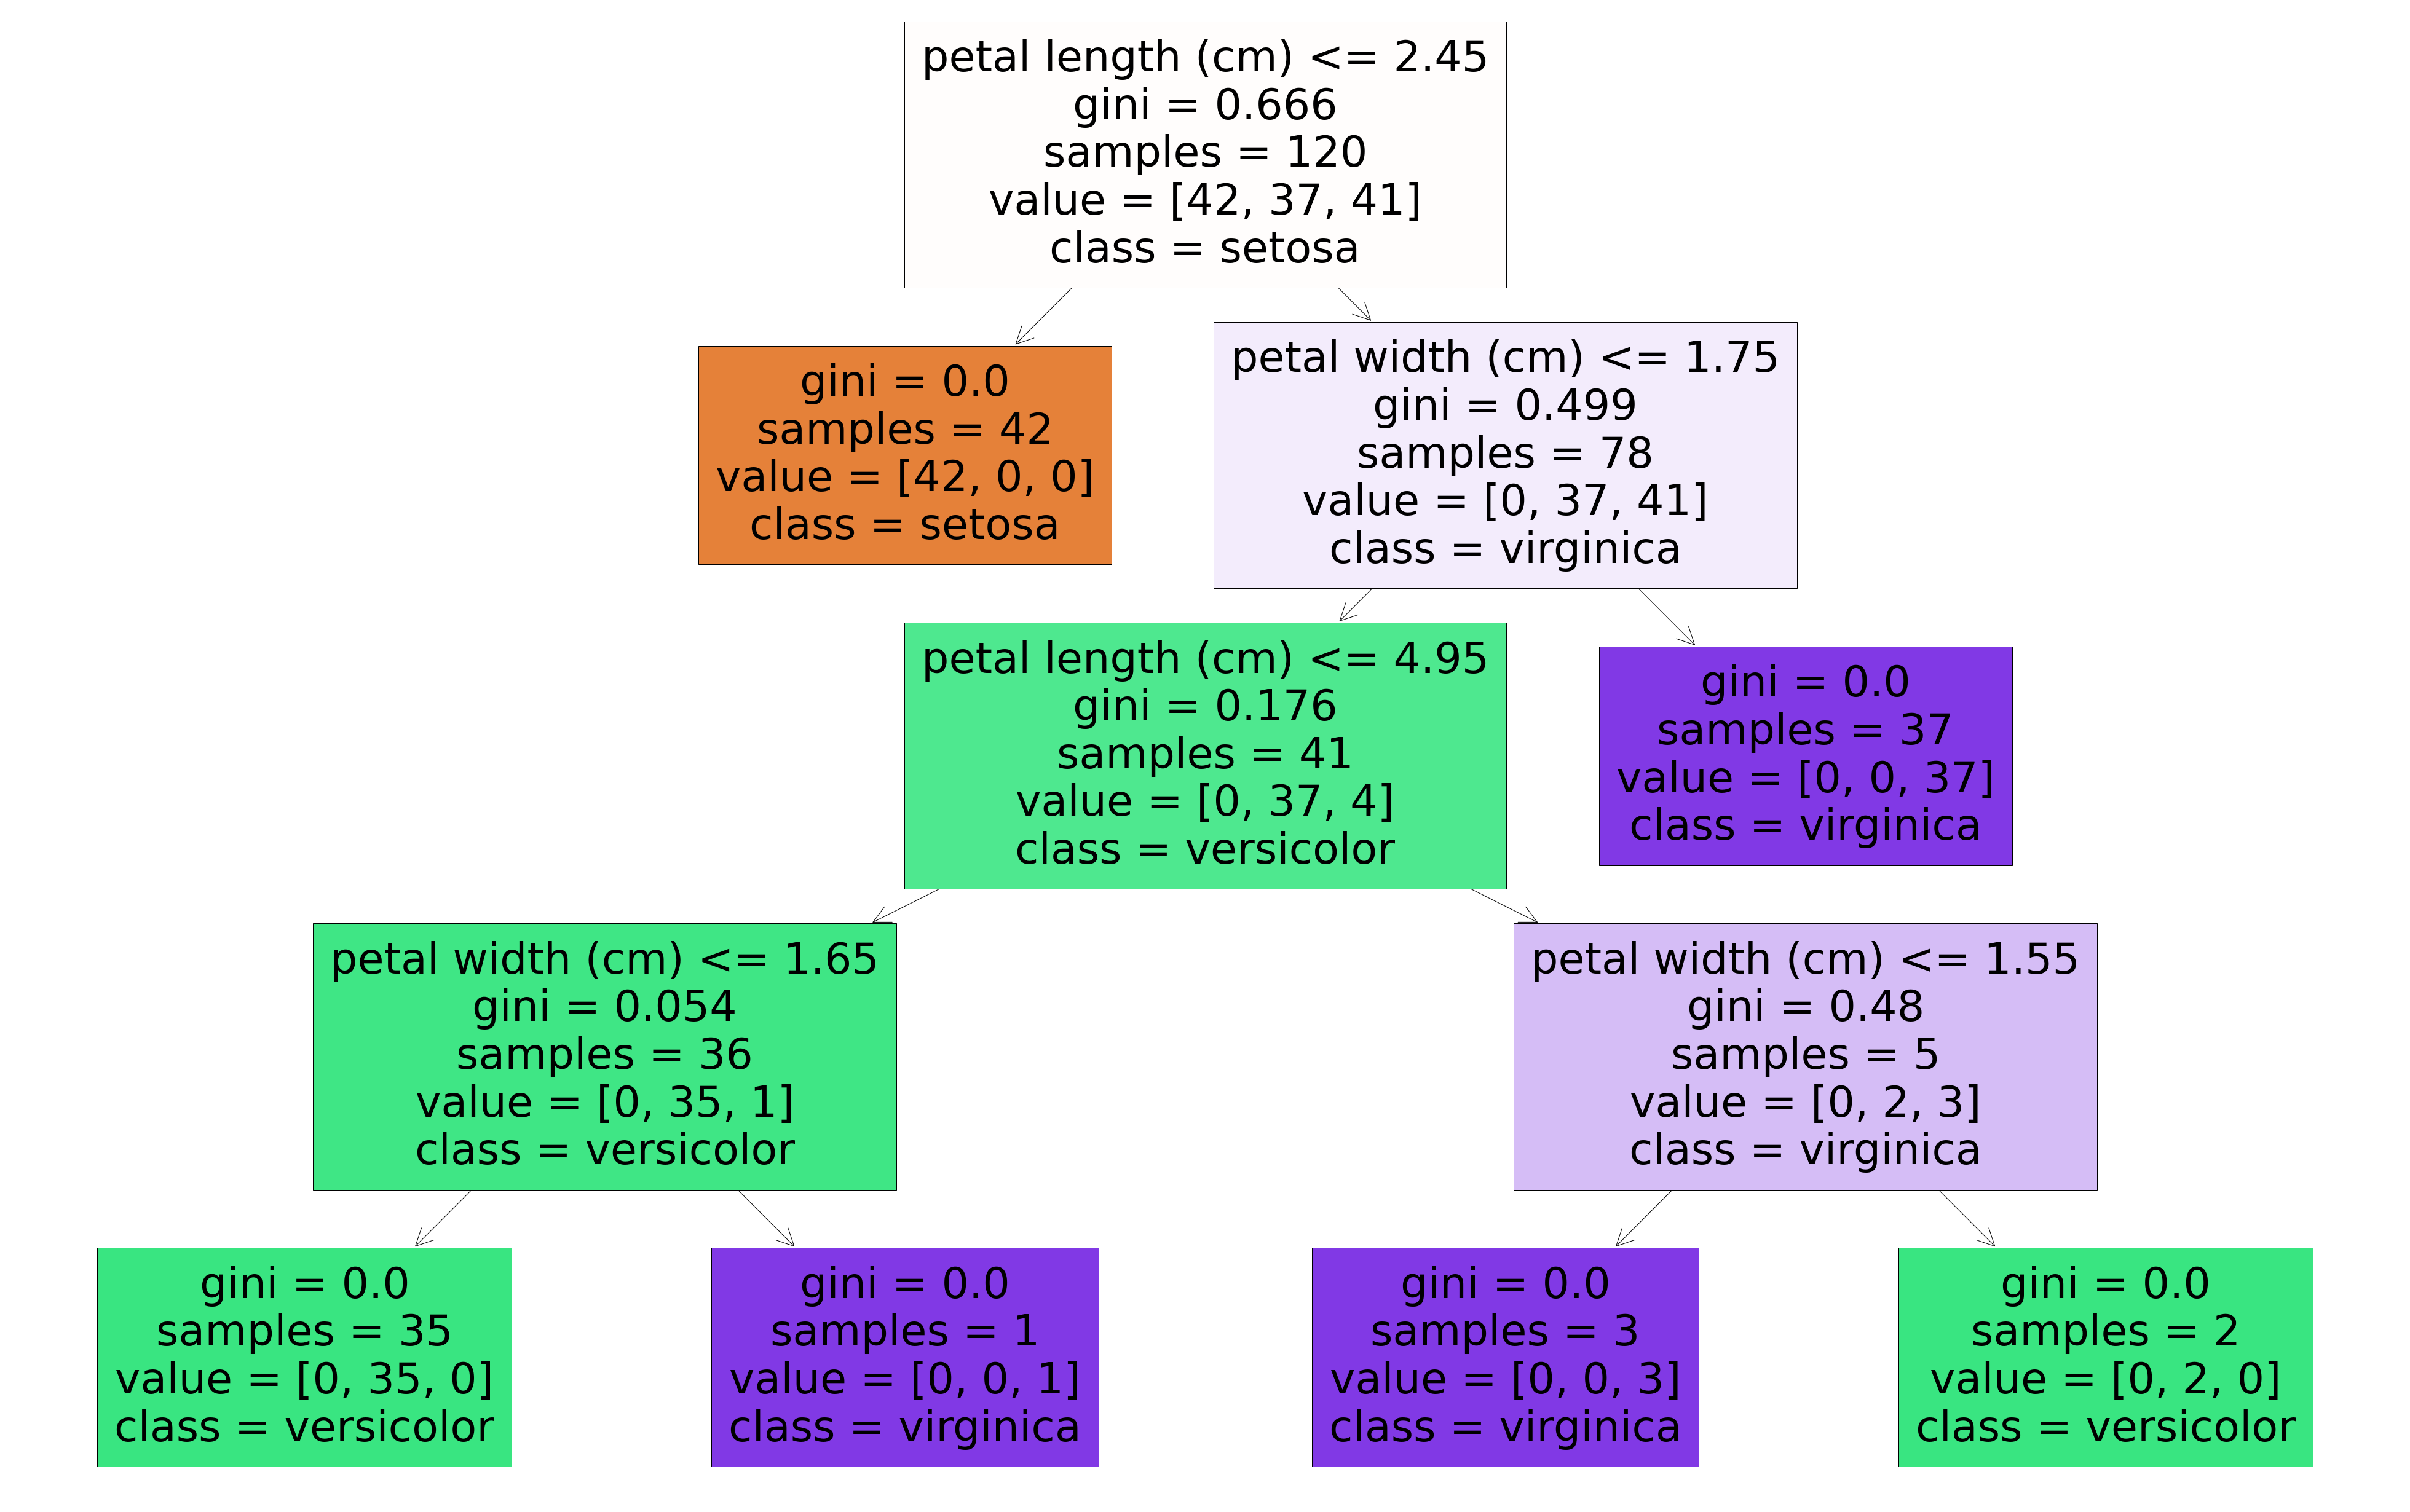

In [12]:
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names = iris.feature_names,class_names=iris.target_names,filled=True)